In [ ]:
# This notebook is inspired by scikit learn examples
# Author: Virgile Fritsch <virgile.fritsch@inria.fr>
# License: BSD 3 clause
# Link - https://scikit-learn.org/stable/auto_examples/applications/plot_outlier_detection_wine.html#sphx-glr-auto-examples-applications-plot-outlier-detection-wine-py

# Outlier Detection on Wine Dataset

In this notebook, we'll explore different outlier detection algorithms using the `wine` dataset from `sklearn`. We will compare `Empirical Covariance`, `Robust Covariance (Minimum Covariance Determinant)`, and `One-Class SVM` by visualizing their decision boundaries.

## Imports and Constants


In [1]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from sklearn.covariance import EllipticEnvelope
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import OneClassSVM
from sklearn.datasets import load_wine
import pandas as pd
import seaborn as sns

# Define outlier detection estimators
ESTIMATORS = {
    "Empirical Covariance": EllipticEnvelope(support_fraction=1.0, contamination=0.25),
    "Robust Covariance (Minimum Covariance Determinant)": EllipticEnvelope(contamination=0.25),
    "OCSVM": OneClassSVM(nu=0.25, gamma=0.35),
}


## Load the Data

In [2]:
# Load and prepare the data
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


### First Example

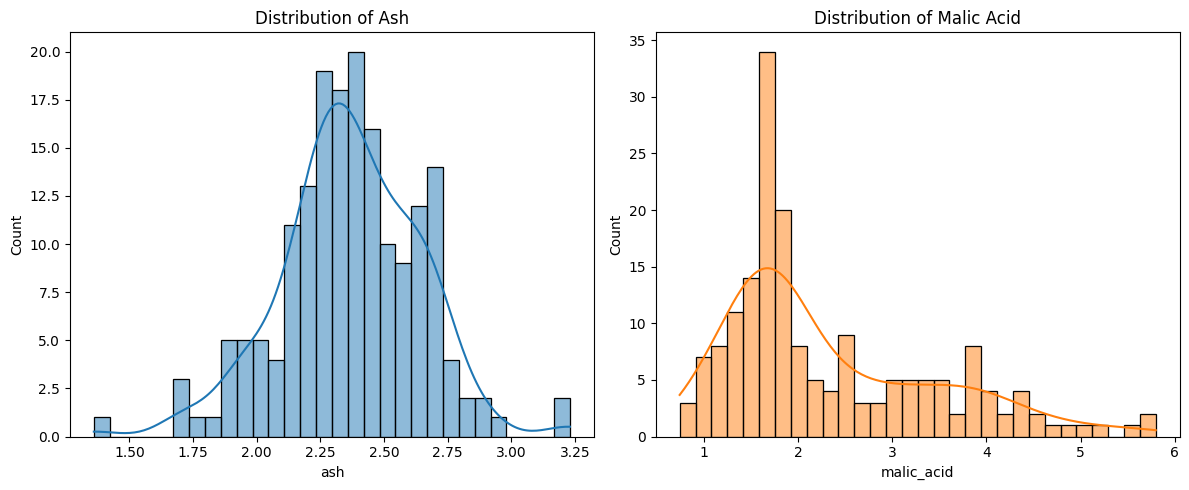

In [5]:
# Define feature columns for visualization
features = ['malic_acid', 'ash']

# Extract features and target for simplicity in plotting
X = df[features].values
target = df['target'].values

# Set color palette for classes
class_palette = sns.color_palette("husl", len(df['target'].unique()))

# Plot histograms of features
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['ash'], bins=30, kde=True, color='tab:blue')
plt.title('Distribution of Ash')

plt.subplot(1, 2, 2)
sns.histplot(df['malic_acid'], bins=30, kde=True, color='tab:orange')
plt.title('Distribution of Malic Acid')

plt.tight_layout()
plt.show()


### 2. Scatter Plot of Selected Features
Plot the scatter plot of 'ash' vs. 'malic_acid' with different colors for each class.


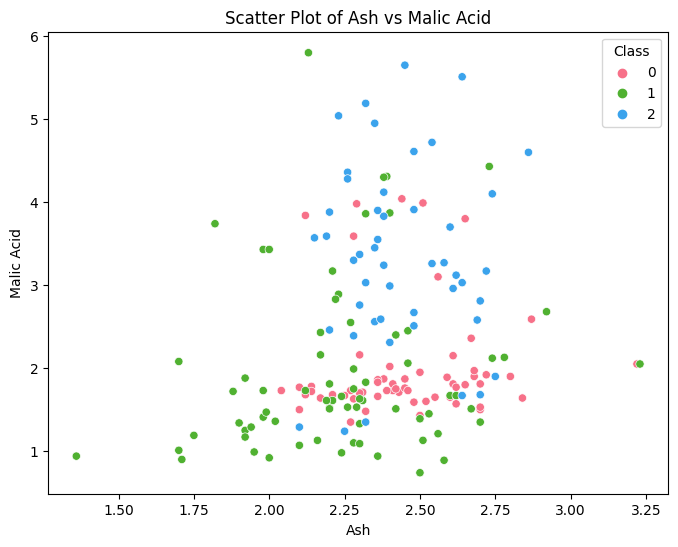

In [6]:
# Scatter plot of selected features
plt.figure(figsize=(8, 6))
sns.scatterplot(x='ash', y='malic_acid', hue='target', palette=class_palette, data=df)
plt.title('Scatter Plot of Ash vs Malic Acid')
plt.xlabel('Ash')
plt.ylabel('Malic Acid')
plt.legend(title='Class')
plt.show()


### 3. Pair Plot of Selected Features
Visualize pairwise relationships between features using a pair plot.


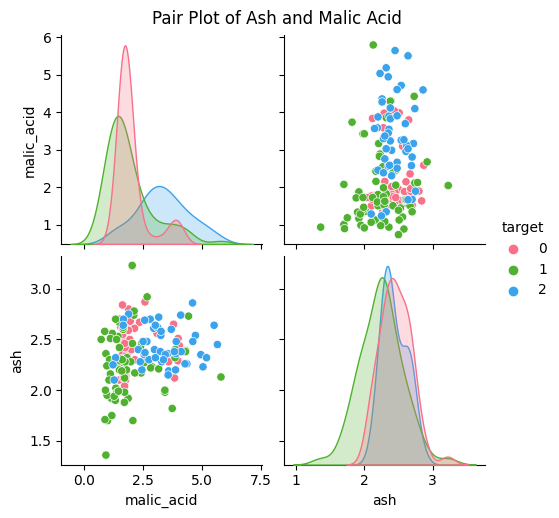

In [8]:
# Pair plot of selected features
sns.pairplot(df[features + ['target']], hue='target', palette=class_palette)
plt.suptitle('Pair Plot of Ash and Malic Acid', y=1.02)
plt.show()


## Outlier Detection

We will now apply different outlier detection algorithms and visualize their decision boundaries on the wine dataset.


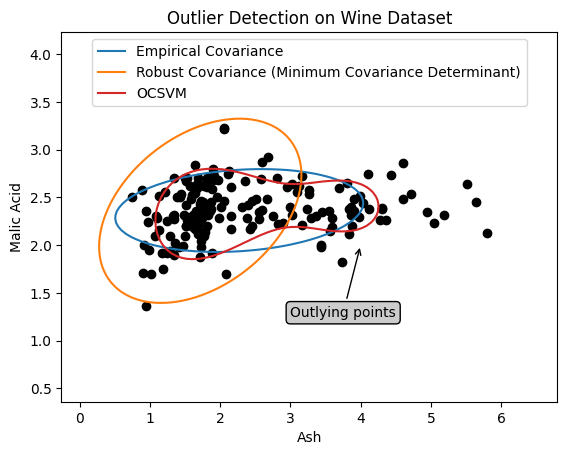

In [9]:
# Plot setup
fig, ax = plt.subplots()
colors = ["tab:blue", "tab:orange", "tab:red"]
legend_lines = []

# Fit models and plot decision boundaries
for color, (name, estimator) in zip(colors, ESTIMATORS.items()):
    # Fit the estimator
    estimator.fit(X)
    
    # Plot decision boundary
    DecisionBoundaryDisplay.from_estimator(
        estimator,
        X,
        response_method="decision_function",
        plot_method="contour",
        levels=[0],
        colors=color,
        ax=ax,
    )
    
    # Prepare legend
    legend_lines.append(mlines.Line2D([], [], color=color, label=name))

# Scatter plot of the data points
ax.scatter(X[:, 0], X[:, 1], color="black")

# Annotations
bbox_args = dict(boxstyle="round", fc="0.8")
arrow_args = dict(arrowstyle="->")
ax.annotate(
    "Outlying points",
    xy=(4, 2),
    xycoords="data",
    textcoords="data",
    xytext=(3, 1.25),
    bbox=bbox_args,
    arrowprops=arrow_args,
)

# Add legend and labels
ax.legend(handles=legend_lines, loc="upper center")
ax.set(
    xlabel="Ash",
    ylabel="Malic Acid",
    title="Outlier Detection on Wine Dataset",
)

plt.show()


### Second Example

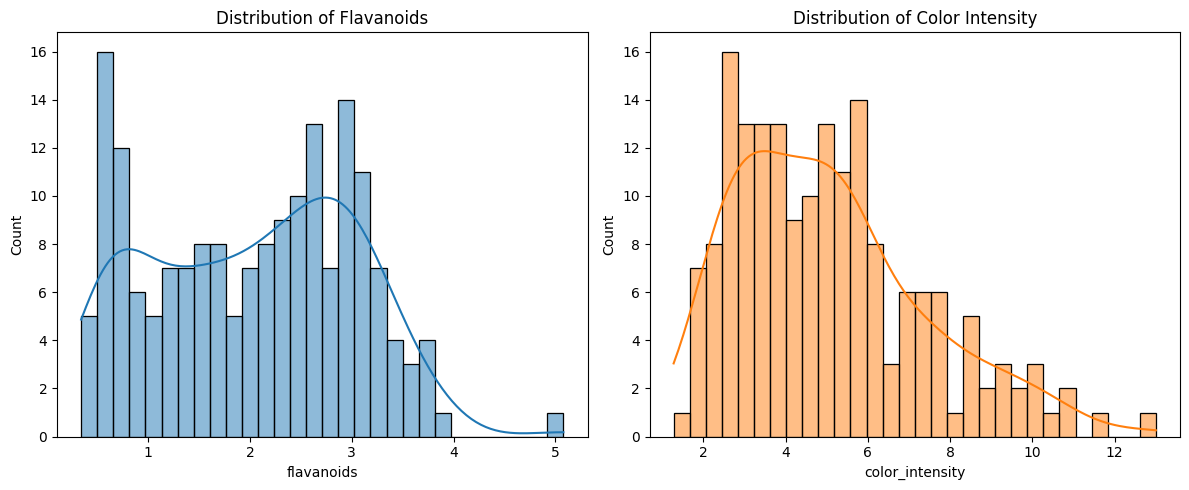

In [14]:
# Define feature columns for visualization
features = ['flavanoids', 'color_intensity']

# Extract features and target for simplicity in plotting
X = df[features].values
target = df['target'].values

# Set color palette for classes
class_palette = sns.color_palette("husl", len(df['target'].unique()))

# Plot histograms of features
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['flavanoids'], bins=30, kde=True, color='tab:blue')
plt.title('Distribution of Flavanoids')

plt.subplot(1, 2, 2)
sns.histplot(df['color_intensity'], bins=30, kde=True, color='tab:orange')
plt.title('Distribution of Color Intensity')

plt.tight_layout()
plt.show()


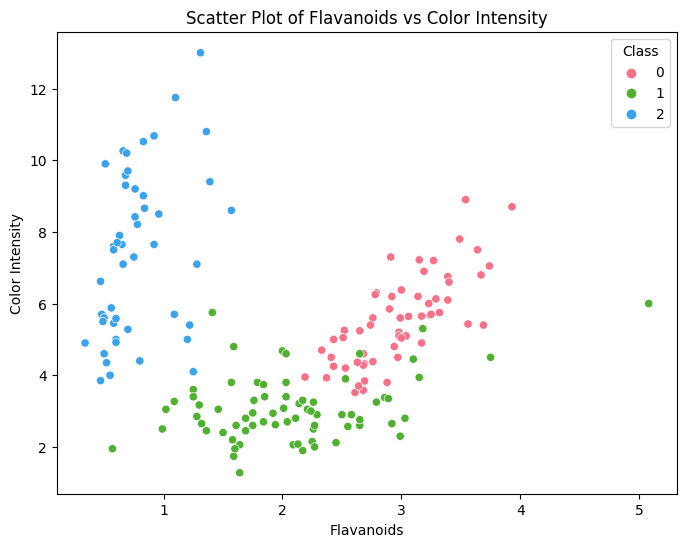

In [15]:
# Scatter plot of selected features
plt.figure(figsize=(8, 6))
sns.scatterplot(x='flavanoids', y='color_intensity', hue='target', palette=class_palette, data=df)
plt.title('Scatter Plot of Flavanoids vs Color Intensity')
plt.xlabel('Flavanoids')
plt.ylabel('Color Intensity')
plt.legend(title='Class')
plt.show()


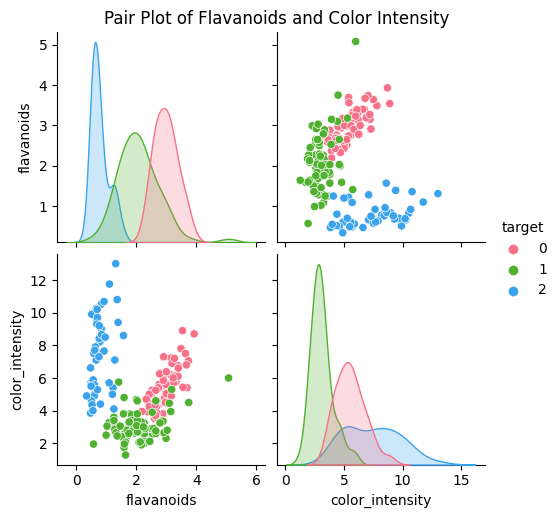

In [16]:
# Pair plot of selected features
sns.pairplot(df[features + ['target']], hue='target', palette=class_palette)
plt.suptitle('Pair Plot of Flavanoids and Color Intensity', y=1.02)
plt.show()


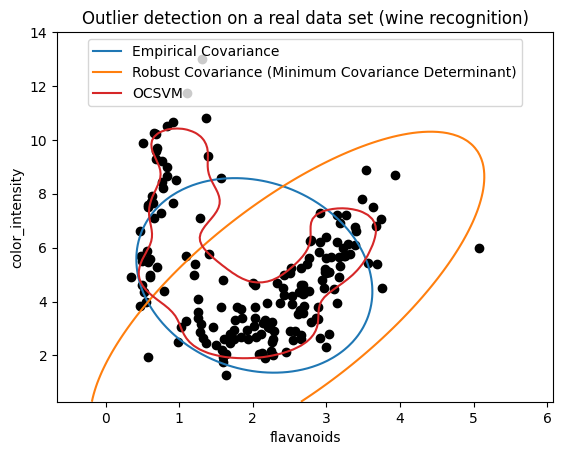

In [17]:
fig, ax = plt.subplots()
colors = ["tab:blue", "tab:orange", "tab:red"]
# Learn a frontier for outlier detection with several classifiers
legend_lines = []
for color, (name, estimator) in zip(colors, ESTIMATORS.items()):
    estimator.fit(X)
    DecisionBoundaryDisplay.from_estimator(
        estimator,
        X,
        response_method="decision_function",
        plot_method="contour",
        levels=[0],
        colors=color,
        ax=ax,
    )
    legend_lines.append(mlines.Line2D([], [], color=color, label=name))


ax.scatter(X[:, 0], X[:, 1], color="black")
ax.legend(handles=legend_lines, loc="upper center")
ax.set(
    xlabel="flavanoids",
    ylabel="color_intensity",
    title="Outlier detection on a real data set (wine recognition)",
)

plt.show()

## Takeaway

This example demonstrates the importance of robust covariance estimation for both outlier detection and understanding data structure.

We use two-variable subsets from the Wine dataset to illustrate different outlier detection methods. While this visualization is in 2D, high-dimensional cases are more complex.

The empirical covariance estimate is highly influenced by outliers, while the `robust covariance estimate`, though assuming Gaussian distribution, better captures the main data mode. The `One-Class SVM`, not assuming a specific data distribution, models complex data shapes more effectively.

In the first example, the `Minimum Covariance Determinant (MCD)` robust estimator focuses on the main cluster, while empirical covariance is skewed by outliers. Although tools like `Support Vector Machines` and `Gaussian Mixture Models` could identify clusters, they are less effective in high dimensions.

The second example shows that `MCD` accurately captures the main data mode, despite the challenges of estimating covariance in non-Gaussian distributions. `One-Class SVM` captures complex data structures well but requires careful tuning of its kernel bandwidth to balance between fitting the data shape and avoiding overfitting.
